In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student-mat.csv')
#data = data.reset_index()
data = data.rename(columns = {'G1': 'first_period_grade', 'G2': 'second_period_grade', 'G3': 'final_grade'})
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   school               395 non-null    object
 1   sex                  395 non-null    object
 2   age                  395 non-null    int64 
 3   address              395 non-null    object
 4   famsize              395 non-null    object
 5   Pstatus              395 non-null    object
 6   Medu                 395 non-null    int64 
 7   Fedu                 395 non-null    int64 
 8   Mjob                 395 non-null    object
 9   Fjob                 395 non-null    object
 10  reason               395 non-null    object
 11  guardian             395 non-null    object
 12  traveltime           395 non-null    int64 
 13  studytime            395 non-null    int64 
 14  failures             395 non-null    int64 
 15  schoolsup            395 non-null    object
 16  famsup  

In [3]:
unnecessary_cols = ['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
data = data.drop(columns=unnecessary_cols)

In [4]:
#print(data.head())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   school               395 non-null    object
 1   studytime            395 non-null    int64 
 2   failures             395 non-null    int64 
 3   schoolsup            395 non-null    object
 4   famsup               395 non-null    object
 5   paid                 395 non-null    object
 6   activities           395 non-null    object
 7   nursery              395 non-null    object
 8   higher               395 non-null    object
 9   internet             395 non-null    object
 10  romantic             395 non-null    object
 11  famrel               395 non-null    int64 
 12  freetime             395 non-null    int64 
 13  goout                395 non-null    int64 
 14  Dalc                 395 non-null    int64 
 15  Walc                 395 non-null    int64 
 16  health  

In [5]:
data.head()

,school,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,...,famrel,freetime,goout,Dalc,Walc,health,absences,first_period_grade,second_period_grade,final_grade
0,GP,2,0,yes,no,no,no,yes,yes,no,...,4,3,4,1,1,3,6,5,6,6
1,GP,2,0,no,yes,no,no,no,yes,yes,...,5,3,3,1,1,3,4,5,5,6
2,GP,2,3,yes,no,yes,no,yes,yes,yes,...,4,3,2,2,3,3,10,7,8,10
3,GP,3,0,no,yes,yes,yes,yes,yes,yes,...,3,2,2,1,1,5,2,15,14,15
4,GP,2,0,no,yes,yes,no,yes,yes,no,...,4,3,2,1,2,5,4,6,10,10


In [6]:
data['studytime'].value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

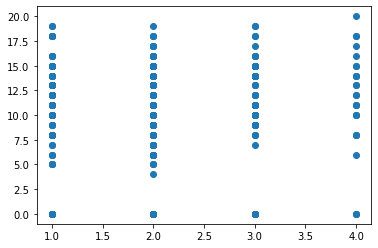

In [7]:
#correlation between studytime and final grade
plt.scatter(data['studytime'], data['final_grade'], alpha=1)
plt.show()

In [8]:
#group by average based on internet usage
avg_by_internet = data['final_grade'].groupby(by=data['internet'])
print(avg_by_internet.head())

0      6
1      6
2     10
3     15
4     10
5     15
6     11
7      6
17    10
35     6
Name: final_grade, dtype: int64
